<a href="https://colab.research.google.com/github/SrishtiSharma645/Colab-files/blob/main/project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MULTILINEAR REGRESSION ON DIABETES DATASET**
(PREDICTING % OF DIABETES)

# 1) Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2) read csv file

In [ ]:
url="/content/drive/MyDrive/diabetes.csv"
df= pd.read_csv(url)

# 3) Data Analysis

## understand the dataset

In [ ]:
df.head()            #top five records of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape            #no. of rows and columns

(768, 9)

In [ ]:
df.columns         #column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes           #data types of columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()           #summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()       #statical summary
# count :- the number of NoN-empty rows in a feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**conclusion:** we have saw that min value in many column are 0 , which is medically not possible , so we have to replace it with mean/median and also max value of insulin is 846 which is far away from another values , so we also have to handle outliers also.

##Data Cleaning

In [ ]:
df=df.drop_duplicates()      #drop the duplicate rows

In [ ]:
df.isnull().sum()          #check for NULL or missing values
#conclusion: no null values in dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#check for 0 value column wise
print(df[df["Glucose"]==0].shape[0])
print(df[df["BloodPressure"]==0].shape[0])
print(df[df["SkinThickness"]==0].shape[0])
print(df[df["Insulin"]==0].shape[0])
print(df[df["BMI"]==0].shape[0])
#as pregnancy may be 0 ....and age ,DiabetesPedigreeFunction have non zero min value ..so we not check for them.


5
35
227
374
11


As here some of colums have **skewed distribution** (one side more sharper than the other) it means here **mean is more affected by outliers than median**. so we repalce these columns values with median and column with normal distribution repalce it with mean value

so replace 0 values of Glucose and Blood Pressure column with mean(normal distribution)

and replace 0 values of SkinThickness, Insulin,BMI column with median(skewed distribution)

In [ ]:
#replacing 0 value with mean/median
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].median())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].median())
df["BMI"]=df["BMI"].replace(0,df["BMI"].median())


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


# 4) Data Visualization

**count plot**

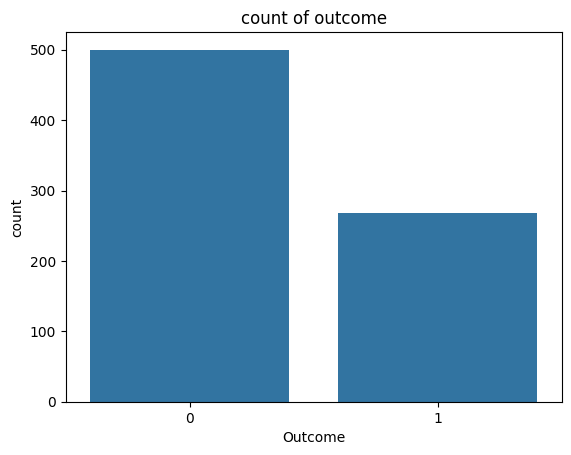

In [ ]:
# counts the occurrences of categories in the data.
# count plot used to see if dataset is balanced or not
sns.countplot(x='Outcome',data=df)
plt.title("count of outcome")
plt.show()


as here we saw that no of people who do not have diabetes is far more than people who do, so we concluded that our **data is not balanced.**

**histogram**

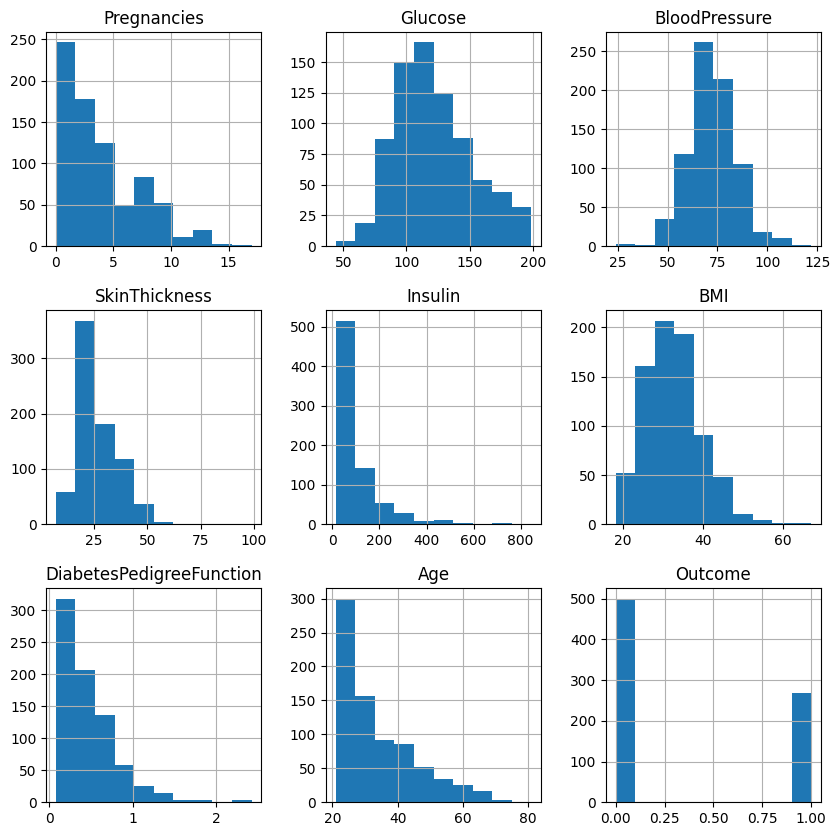

In [ ]:
#it is used to see whether dataset is normally distributed or skewed
# gives frequency of x val in y axis
df.hist(bins=10,figsize=(10,10))
plt.show()


Here only Glucose and BloodPressure are normally distributed, rest all other are skewed and have outliers.

**Box Plot**

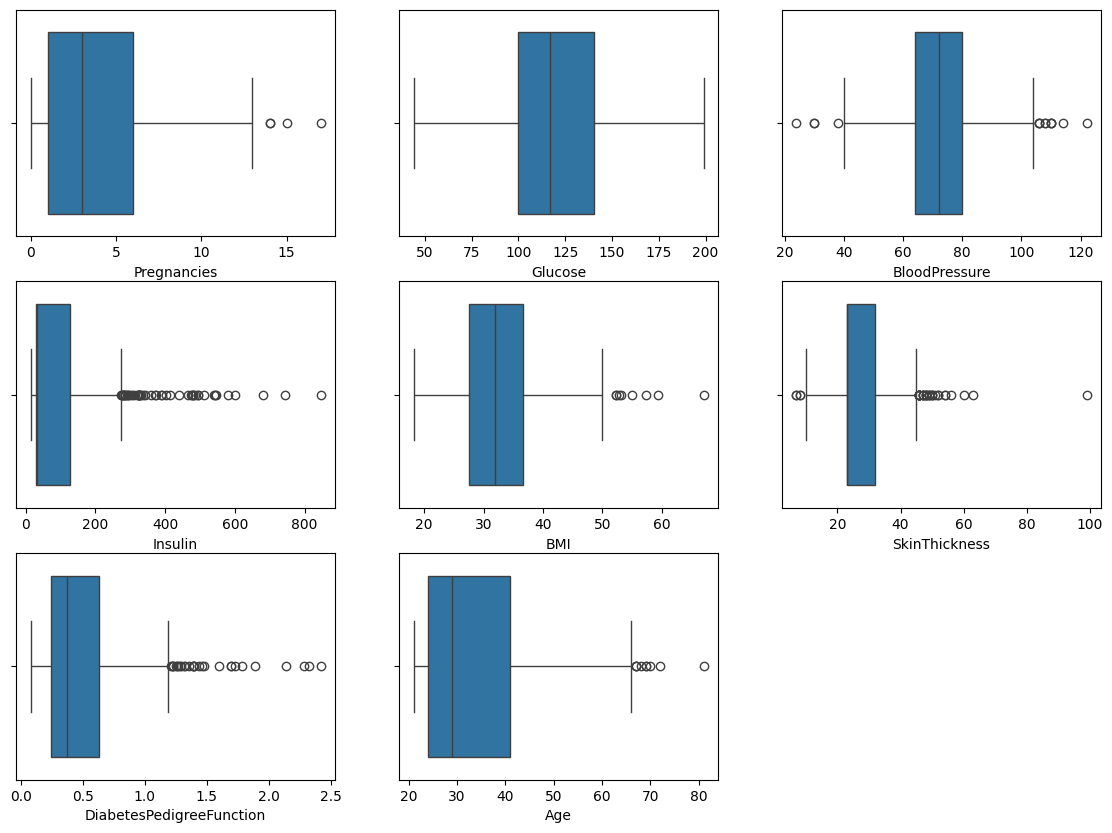

In [ ]:
#it is used to analyse the distribution and see the outliers
plt.figure(figsize=(14,10))
plt.subplot(3,3,1)            #subplot(row,col,position)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Age',data=df)
plt.show()

here removing outliers can cause data loss ,so we have to deal with it using various scaling and transformation techniques.

**scatter plot**

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

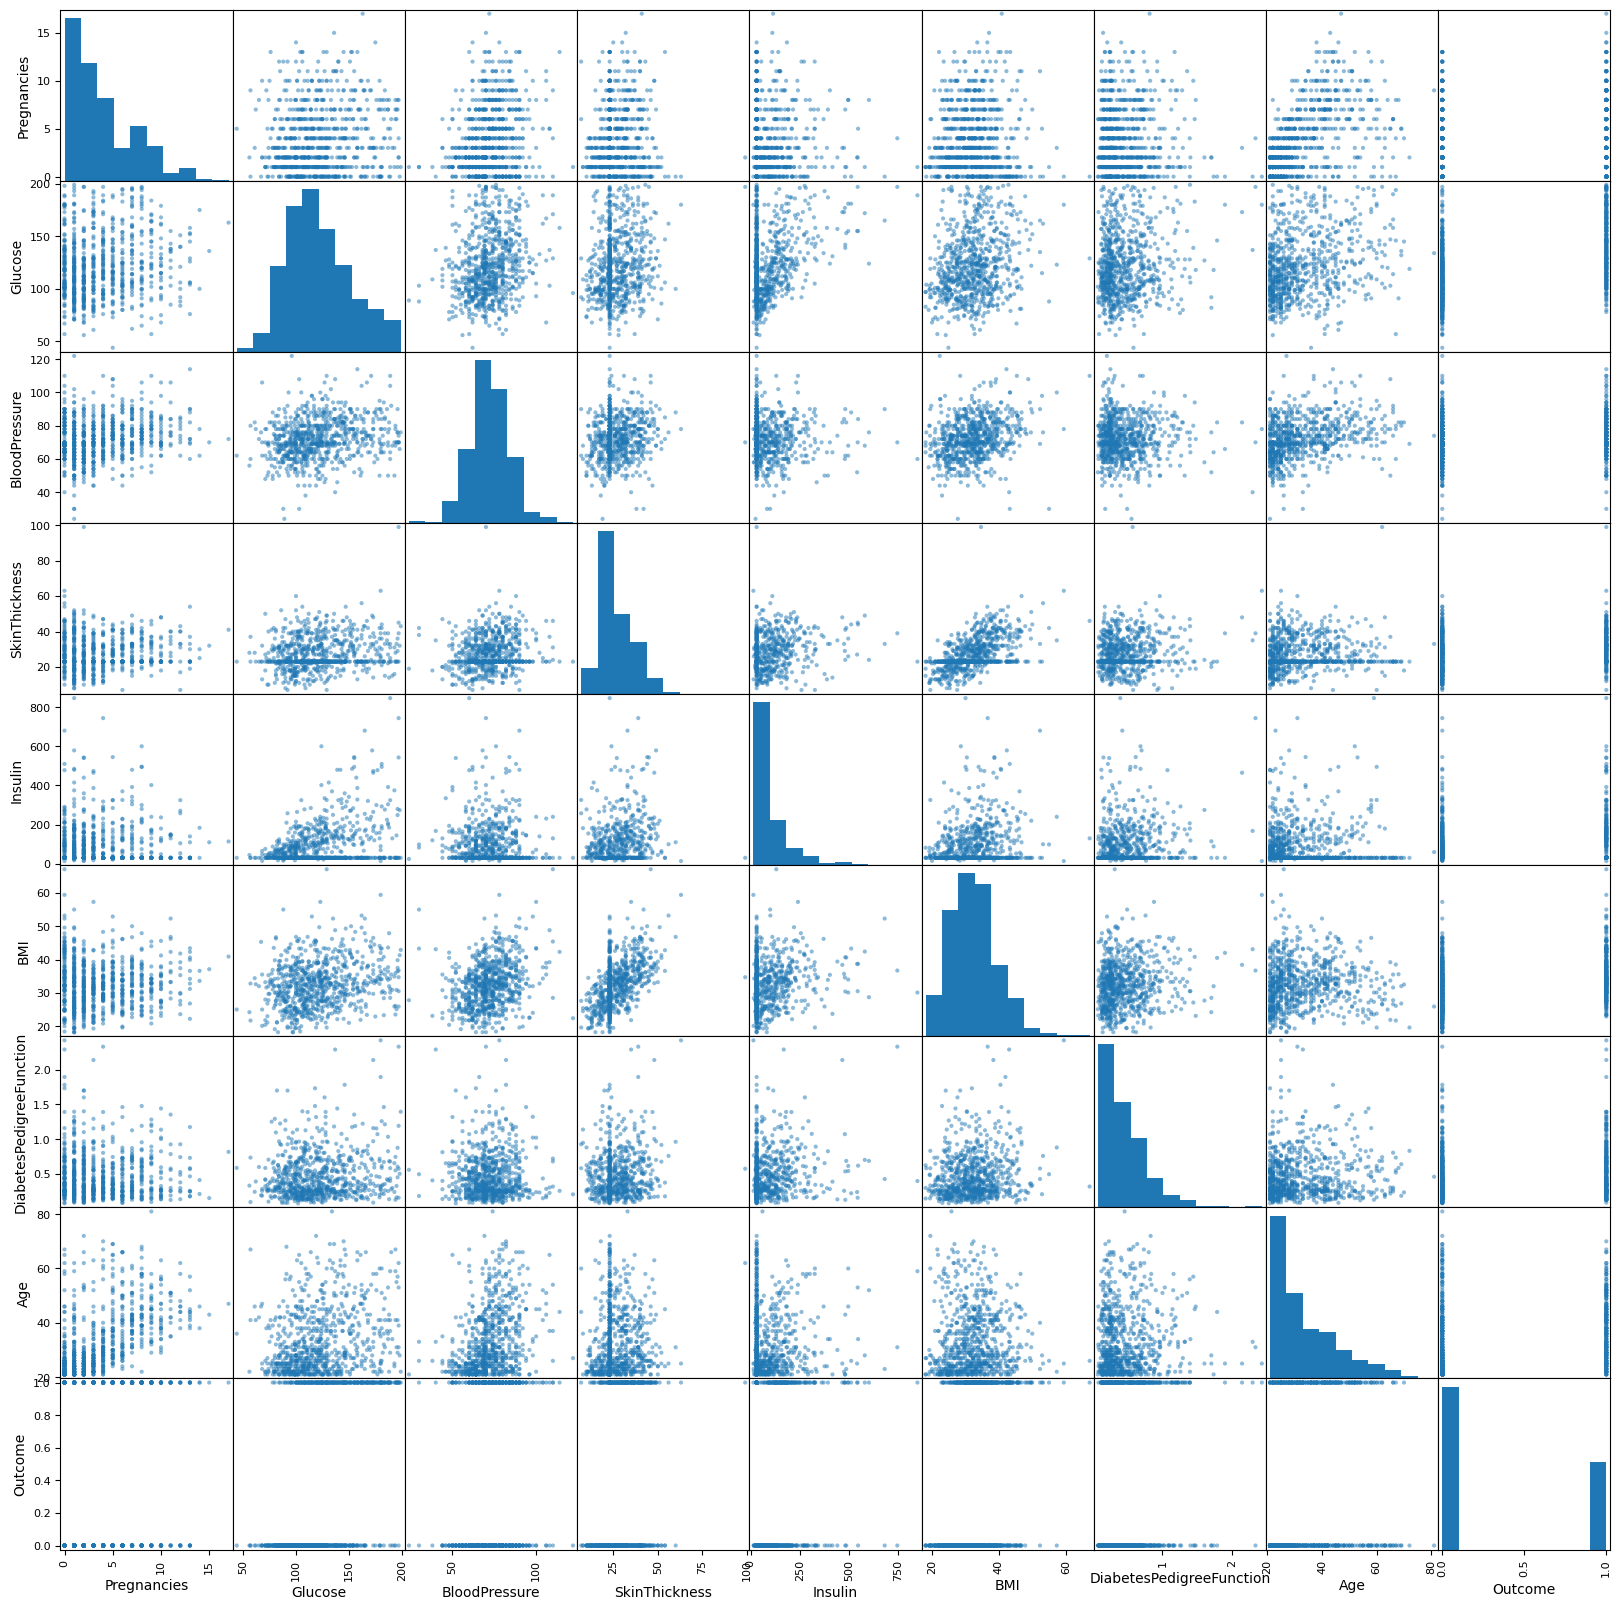

In [ ]:
#it is used to understand relationship b/w any two variables
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

as here we saw that women with higher no of pregnancies have lower insulin.

# 5) Feature Selection

**heatmap**

we use heatmap to find the correlation between columns.
here value ranges from -1 to +1

 1 means that they are highly correlated(one variable increases, the other tends to also increase.)

 -1 means that  one variable increases then the other tends to decrease  

 and 0 means no correlation.

<Axes: >

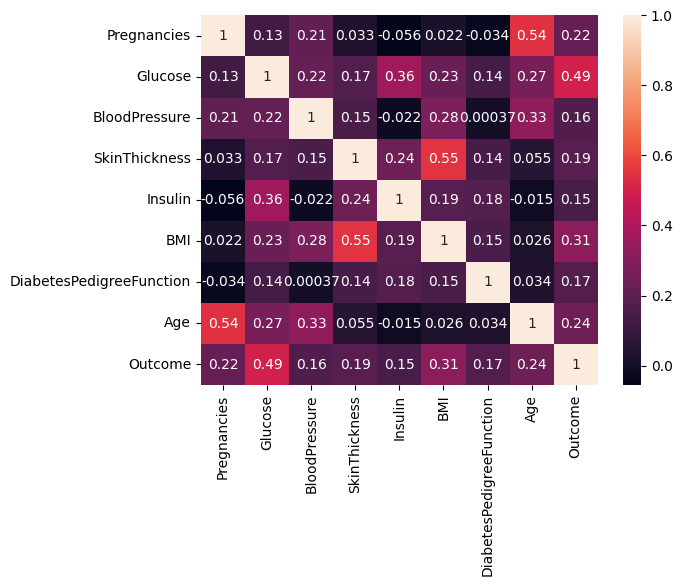

In [ ]:
corrmat=df.corr()   #correlation matrix
sns.heatmap(corrmat,annot=True)      #annot displaying the numeric value each cell represents.

By observing the last column "Outcome" we concluded that glucose,bmi ,age are most correlated with outcome

and,BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, so they are not contribute much to the model...so we can drop them.

In [ ]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis=1)
df_selected.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148,35,33.6,50,1
1,1,85,29,26.6,31,0
2,8,183,0,23.3,32,1
3,1,89,23,28.1,21,0
4,0,137,35,43.1,33,1


# 6) Handling Outliers

outlier is a datapoint in dataset which is distant from all other observations.
* we can use **boxplot,scatterplot or Z score** to identify outliers.

* here we use quantile transforms to treating the outliers that follow a uniform or a normal distribution

* by applying the **quantile transform**(to convert dataset to normal distribution) the outliers are still present in dataset but their impact has been reduced.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile=QuantileTransformer()     #creating instance
X=quantile.fit_transform(x)      #fit and transform data
df_new=pd.DataFrame(X,columns=x.columns)     #creating new dataframe  after removing outliers
df_new.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.097784,0.644720,0.227510,0.558670,0.0
2,0.863755,0.956975,0.000000,0.091917,0.585398,1.0
3,0.232725,0.131030,0.505867,0.298566,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

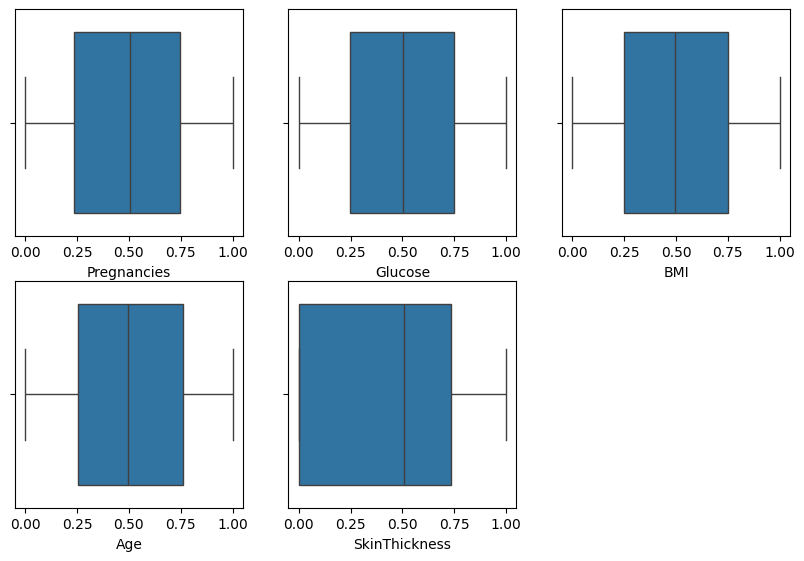

In [ ]:
#draw boxplot again to saw is there any outlier remaining or not
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)            #subplot(row,col,position)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# 7) split the data into x and y

In [ ]:
y=df_new["Outcome"]                       #y=df_new.iloc[:,-1]
x=df_new.drop("Outcome",axis=1)           #x=df_new.iloc[:,:5]

In [ ]:
x.head()          #contain only independent features

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.097784,0.644720,0.227510,0.558670
2,0.863755,0.956975,0.000000,0.091917,0.585398
3,0.232725,0.131030,0.505867,0.298566,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [ ]:
y.head()           #contain dependent features

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

# 8) Train Test Split

It is used to evaluate the performance of the algorithm.
* Train Dataset: Used to fit the machine learning model.

* Test Dataset: Used to evaluate the fit machine learning model.

generally we use 80% for train and 20% for test.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)       # 20 % data for test
#random_state means it prevent shuffling of data each time ...it can be any integer value

In [ ]:
x_train.shape , y_train.shape

((614, 5), (614,))

In [ ]:
x_test.shape , y_test.shape

((154, 5), (154,))

# 9)  Create a model and Fit the data

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

-0.27255325484494647

In [ ]:
model.coef_

array([0.02484631, 0.60632564, 0.01483429, 0.33277447, 0.27997854])

# 10) Prediction

In [ ]:
result=model.predict(x_test)

In [ ]:
result

array([ 0.69667   ,  0.22394882,  0.05989896,  0.6093444 ,  0.18773857,
       -0.07457182,  0.64356065,  0.76015766,  0.3068626 ,  0.47267636,
        0.55901053,  0.91005396,  0.34075138, -0.02003589,  0.15038613,
        0.2142957 ,  0.69326397, -0.21819048,  0.53860039,  0.2557041 ,
        0.68886279,  0.35570748,  0.01157215,  0.2109192 , -0.05968791,
        0.33993643,  0.04491848,  0.76664244,  0.13618059,  0.2105923 ,
        0.50714698,  0.21738131,  0.14575754,  0.46429287,  0.14860015,
        0.68983363,  0.51642483,  0.10352146,  0.38786606,  0.62868332,
        0.33095795,  0.13155809,  0.14425264,  0.65824515,  0.75312718,
       -0.08402095,  0.03692976,  0.34703408,  0.32509019,  0.39279434,
        0.43332175,  0.18969355,  0.76111408,  0.56551618,  0.2111633 ,
       -0.17642737,  0.03420684,  0.49241187,  0.3269171 ,  0.18914089,
        0.79748324,  0.60961263,  0.14157598,  0.50465702,  0.59825743,
        0.62078509,  0.67500185,  0.31431831,  0.33677947,  0.12

In [ ]:
print(round(result[0]*100,2),"%")

69.67 %


#11) model accuracy

In [ ]:
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error


In [ ]:
r2_score(y_test,result)     # It ranges from 0 to 1, where 1 indicates perfect predictions.

0.3038926072570084

In [ ]:
mean_absolute_error(y_test,result)

0.32384216402458177

In [ ]:
mean_squared_error(y_test,result)

0.14761022424120868

**all together**

In [ ]:
#all together
url="/content/drive/MyDrive/diabetes.csv"
df= pd.read_csv(url)
df=df.drop_duplicates()
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].median())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].median())
df["BMI"]=df["BMI"].replace(0,df["BMI"].median())
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis=1)
df_selected.head()
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile=QuantileTransformer()
X=quantile.fit_transform(x)
df_new=pd.DataFrame(X,columns=x.columns)
df_new.head()
y=df_new["Outcome"]
x=df_new.drop("Outcome",axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
result=model.predict(x_test)
print(str(round(result[0]*100,2))+"%")

69.94%


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
